In [1]:
import pandas as pd
import numpy as np
import warnings # отключим предупреждения Anaconda
warnings.simplefilter('ignore')
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' #графики в svg выглядят более четкими
from pylab import rcParams #увеличим дефолтный размер графиков
rcParams['figure.figsize'] = 8, 5
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go

init_notebook_mode(connected=True)
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
pd.options.display.float_format = '{:,.1f}'.format # Отображение чисел float с запятыми и 1 знаком после точки

СОРТИРОВКА

In [ ]:
df = df.dropna()

In [ ]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [ ]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

In [ ]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

In [ ]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots для соответствующих пар признаков. Для сохранения графиков в файлы стоит использовать метод savefig.

In [ ]:
sns.distplot(df.Critic_Score)

In [ ]:
sns.jointplot(df.Critic_Score, df.User_Score)

In [ ]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y='Platform', x='Global_Sales', data=df[df.Platform.isin(top_platforms)], orient = 'h')

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='Platform',
                        columns='Genre',
                        values='Global_Sales',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.4)

In [ ]:
#Посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

In [ ]:
#создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global_Sales'
)

In [ ]:
#создаем линию для числа вышедших игр
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

In [ ]:
#Определяем массив данных и задаем title графика в Layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

В plotly строится визуализация объекта Figure, который состоит из данных (массив линий, которые в библиотеке называются traces) и оформления/стиля, за который отвечает объект layout. В простых случаях можно вызывать функцию iplot и просто от массива traces.

Параметр show_link отвечает за ссылки на online-платформу plot.ly на графиках. Поскольку обычно это функциональность не нужна, то я предпочитаю скрывать ее для предотвращения случайных нажатий.

In [ ]:
#создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
#Можно открыть график в html файле
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

In [ ]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

In [2]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [ ]:
df['churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов')


In [ ]:
corr_matrix = df.drop(['state', 'international plan', 'voice mail plan',
                      'area code'], axis=1).corr()

In [ ]:
sns.heatmap(corr_matrix);

In [ ]:
features = list(set(df.columns) - set(['state', 'international plan', 'voice mail plan',  'area code',
                                      'total day charge',   'total eve charge',   'total night charge',
                                        'total intl charge', 'churn']))

df[features].hist(figsize=(20,12));

In [ ]:
sns.pairplot(df[features + ['churn']], hue='churn');

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='churn', y=feat, data=df, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('churn')
    axes[idx / 4, idx % 4].set_ylabel(feat);

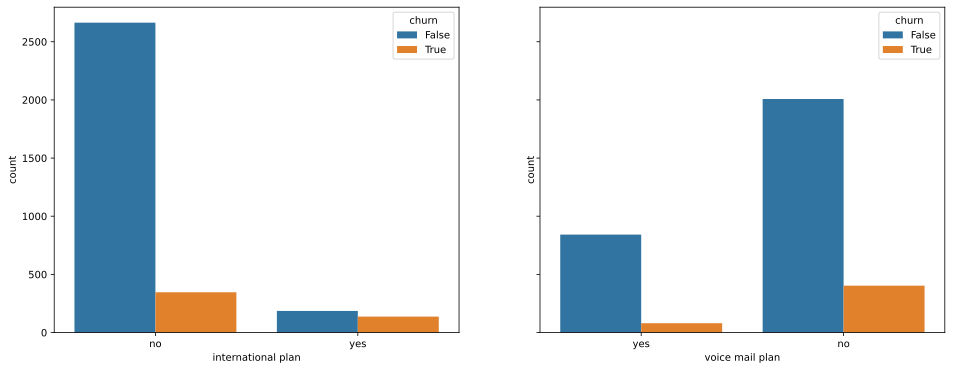

In [3]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

In [5]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [8]:
# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['churn', 'state'], axis=1)
X['international plan'] = pd.factorize(X['international plan'])[0]
X['voice mail plan'] = pd.factorize(X['voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

ValueError: could not convert string to float: '382-4657'

In [9]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

NameError: name 'tsne_representation' is not defined